In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction
* This dataset includes whether people buy a product based on their age, gender, and estimated annual salary.

* We will try to predict whether they bought it using the Logistic Regression method.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

<a id='2'><a/>

## Data analysis (EDA)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [14]:
sales = [20, 40, 15, 30, 5,30, 50, 60, 100, 8,1000, 2000]

In [15]:
import plotly.express as px

px.box(sales)

In [5]:
import numpy as np
np.mean(sales)

302.57142857142856

In [6]:
sales1 = [20, 40, 15, 30, 5, 8]
np.mean(sales1)

19.666666666666668

In [ ]:
df.isnull().all()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<a id='3'></a>
## Data Distributions

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Age Of People', 'Distribution Of Ages', 'Estimated Salary Of People', 'Distribution Of Estimated Salary')
)

# Box plot for Age
fig.add_trace(
    go.Box(y=df['Age'], name='Age', marker_color='red'),
    row=1, col=1
)

# Histogram for Age
fig.add_trace(
    go.Histogram(x=df['Age'], marker_color='green'),
    row=1, col=2
)

# Box plot for Estimated Salary
fig.add_trace(
    go.Box(y=df['EstimatedSalary'], name='Estimated Salary', marker_color='blue'),
    row=2, col=1
)

# Histogram for Estimated Salary
fig.add_trace(
    go.Histogram(x=df['EstimatedSalary'], marker_color='yellow'),
    row=2, col=2
)

# Update layout
fig.update_layout(height=600, width=800, title_text="Subplots of Age and Estimated Salary", showlegend=False)
fig.show()


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# Box plot for Estimated Salary by Gender
fig = px.box(df, x='Gender', y='EstimatedSalary', color='Gender',
             labels={"Gender": "Gender", "EstimatedSalary": "Estimated Salary"},
             title="Estimated Salary by Gender",
             color_discrete_sequence=px.colors.qualitative.Bold_r)

# Update layout for first plot
fig.update_layout(width=750, height=500)

# Show first plot
fig.show()

# Box plot for Age by Gender
fig2 = px.box(df, x='Gender', y='Age', color='Gender',
              labels={"Gender": "Gender", "Age": "Age"},
              title="Ages by Gender",
              color_discrete_sequence=px.colors.qualitative.Bold_r)

# Update layout for second plot
fig2.update_layout(width=750, height=500)

# Show second plot
fig2.show()


In [20]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [24]:
grp = df.groupby('Gender').count()
grp

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,204,204,204,204
Male,196,196,196,196


In [25]:
# Simple count plot for 'Purchased'
fig = px.histogram(df, x='Purchased', text_auto=True,
                   title='Number of People Purchased',
                   color_discrete_sequence=['indianred'])  # setting the color for the plot
fig.update_layout(bargap=0.2)  # Adjust the gap between bars
fig.update_traces(marker_line_color='black', marker_line_width=1.5)  # Outlines for the bars
fig.show()

# Count plot for 'Purchased' by Gender
fig2 = px.histogram(df, x='Purchased', color='Gender', barmode='group', text_auto=True,
                    title='Number of People Purchased by Gender',
                    color_discrete_sequence=px.colors.sequential.Darkmint_r)
fig2.update_layout(bargap=0.2)  # Adjust the gap between bars
fig2.update_traces(marker_line_color='black', marker_line_width=1.5)  # Outlines for the bars
fig2.show()


In [26]:
df.corr(numeric_only=True)

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [27]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create the heatmap using Plotly
fig = px.imshow(corr_matrix,
                text_auto=True,  # Automatically add text in each cell
                labels=dict(x="Variables", y="Variables", color="Correlation"),
                x=corr_matrix.columns,  # Setting column names for x-axis
                y=corr_matrix.columns,  # Setting column names for y-axis
                color_continuous_scale='Viridis')  # Color scale

# Update layout
fig.update_layout(title='Correlation Matrix', width=600, height=500)
fig.show()


In [28]:
#preparing data
df.drop('User ID',axis = 1, inplace = True)
label = {'Male': 0 ,"Female" : 1}
df['Gender'].replace(label, inplace= True)


In [29]:
# One-hot encoding

# # Assuming 'df' is your DataFrame and 'Gender' is the column to be one-hot encoded
# df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=False)

# # Display the new DataFrame structure
# print(df.head())


<a id='4'></a>
## Prediction

In [30]:
# set inputs and outputs
X = df.drop('Purchased',axis = 1)
y = df['Purchased']

In [31]:
# we have to scale the data for better result

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(d_scaled)
data_scaled1.head()

,0,1,2
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Benefits of Scaling Data
* **Improves Algorithm Performance**:
Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and close to normally distributed.
* **Fairness in Feature Representation**: Standardization ensures that each feature contributes equally to the distance computations, which is especially important for models that compute distances between data points, such as k-means clustering and k-nearest neighbors.

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(d_scaled,y,test_size=0.20,random_state=42)


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1,max_iter = 500)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
LogisticRegression()

### Understanding Logistic Regression Parameters:

1. **Logistic Regression**:
   - **What It Is**: Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In machine learning, this model is used for binary classification tasks, such as predicting whether an event happens or not (yes/no).
  
2. **Parameter `C` (Inverse of Regularization Strength)**:
   - **Definition**: The parameter `C` represents the inverse of regularization strength. Regularization is a technique used to prevent the model from overfitting by penalizing larger coefficients.
   - **Effect of `C=0.1`**: A smaller value of `C` indicates stronger regularization. In this case, setting `C` to 0.1 means applying a fairly strong regularization. This can help to generalize better by keeping the model coefficients smaller and simpler, but too much regularization might lead the model to underfit.
   
3. **Parameter `max_iter` (Maximum Number of Iterations)**:
   - **Definition**: This parameter specifies the maximum number of iterations the algorithm is allowed to iterate or loop until it converges (finds the best coefficients).
   - **Effect of `max_iter = 500`**: Setting `max_iter` to 500 allows the algorithm up to 500 iterations to converge. This is useful for ensuring that the model has enough iterations to find a good fit to the training data, especially when the default number might not suffice. If the model needs more iterations to converge, increasing this number might be necessary.

### Practical Implications:
- **Fitting the Model**: When you fit this model to data, it will try to find the best coefficients for the features by optimizing a cost function. The optimization process will stop either when it converges to a solution or when it reaches the maximum number of iterations you specified.
- **Regularization Trade-offs**: By using a specific `C` value, you control overfitting but at the risk of underfitting if the regularization is too strong. It’s a balance that might need tuning based on the performance of the model on validation data.

In the context of training a machine learning model, such as logistic regression, the term "converge" refers to the process where the algorithm reaches a point where further iterations no longer significantly change the values of the model's parameters (e.g., weights and bias). This indicates that the model has effectively learned from the training data, and additional training won't improve the model's fit to this data.

In [ ]:
print(f'Weight Coefficient : {model.coef_}')
print(f'Bias : {model.intercept_}')

Weight Coefficient : [[-0.06210386  1.39043467  0.79306064]]
Bias : [-0.8686142]


### Weight Coefficients and Bias:

1. **Weight Coefficients (model.coef_):**
   - **What They Are:** These are the parameters in the model that are multiplied by the input features. They determine how much each feature contributes to the output of the model. In your model, the weight coefficients are `[-0.06210386, 1.39043467, 0.79306064]`.
   - **Interpretation:** Each coefficient corresponds to a feature in your input data. For example, the first coefficient (-0.06210386) is multiplied by the first feature, the second coefficient (1.39043467) by the second feature, and so on. A positive coefficient increases the model's output as the feature value increases, while a negative coefficient decreases the output as the feature value increases.
   - **Impact on the Model:**
     - A larger absolute value of a coefficient means that the corresponding feature is more important for predicting the output. In your case, the second feature (coefficient of 1.39043467) has the most significant positive impact on the model’s prediction.

2. **Bias (model.intercept_):**
   - **What It Is:** This is a constant added to the result of the weighted features and it represents the intercept of the model (where the prediction line crosses the y-axis if all features are zero).
   - **Value:** The bias in your model is `-0.8686142`.
   - **Purpose:** The bias allows the model to adjust the output independently of the input features, providing an additional degree of freedom. This helps to better fit the data.
   - **Effect on the Model:** The bias shifts the decision boundary of the model. A negative bias, as in your case, means the model tends to predict lower values before considering the effect of the features.

### Summary:

- **Weights and Bias in the Model**: Together, the weight coefficients and bias determine how changes in input features affect the predictions made by the model. Weights adjust the influence of individual features, and the bias adjusts the output along the range of possible predictions.

- **Importance in Linear Models**: In linear models like logistic regression or linear regression, these coefficients directly shape the prediction equation. Understanding their values helps interpret how the model makes decisions based on the input features.

This explanation should help a student understand the roles of weight coefficients and bias in determining how a machine learning model processes inputs to make predictions.

### Prediction Results

**we can see results in many different ways**


In [ ]:
print(f'Test accuracy: {model.score(X_test,y_test)}')
print(f'Train accuracy: {model.score(X_train,y_train)}')

Test accuracy: 0.8625
Train accuracy: 0.8125


### Explanation of Accuracy Scores:

1. **Accuracy Metric**:
   - Accuracy is a measure used in classification, representing the ratio of the number of correct predictions to the total number of input samples. It is expressed as a decimal or percentage. The formula is:
     
     Accuracy = Number of Correct Predictions / Total Number of Predictions

2. **Train Accuracy (0.8125 or 81.25%)**:
   - This is the accuracy of the model on the training set—the data on which the model was trained. An accuracy of 81.25% means that when the model makes predictions using the training data, it gets 81.25% of those predictions right.
   - This indicates how well the model has learned from the dataset it was trained on. An accuracy of 81.25% is fairly good, suggesting that the model is able to generalize well over the data it was trained on.

3. **Test Accuracy (0.8625 or 86.25%)**:
   - Test accuracy is the accuracy measured on a new, unseen dataset (test set) that was not used during the training of the model. An accuracy of 86.25% here means the model correctly predicted 86.25% of the test data.
   - This is crucial because it provides an estimate of the performance of the model on new, unseen data, reflecting how well the model can generalize beyond the training data. The fact that the test accuracy is higher than the training accuracy is somewhat unusual but could be a good sign, indicating that the model is not overfitting to the training data.

### Key Takeaways:

- **Understanding Overfitting and Underfitting**:
  - **Overfitting**: When a model performs well on training data but poorly on unseen test data (i.e., the model learns the details and noise in the training data too well to the detriment of its performance on new data).
  - **Underfitting**: When a model is too simple, both training and test accuracy will be low because it cannot capture the underlying trend of the data.
  
- In this case, since the test accuracy is higher than the training accuracy, it suggests that the model might be very well-tuned or possibly that the test set might not be challenging enough or is not representative of the real-world scenarios the model will face. It’s also possible that some randomness or specific characteristics of the test set contributed to this result.

- **Consistency Between Train and Test**: Ideally, both accuracies should be high and close to each other. A large gap might suggest problems like overfitting or underfitting, depending on which is higher.

This explanation aims to clarify what these metrics mean and how they can be interpreted in the context of evaluating a machine learning model's performance.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80




### Understanding the Classification Report:

1. **Precision**:
   - **What It Is**: Precision tells you the accuracy of the positive predictions. It is the ratio of true positive predictions to the total predicted positives.
   - **Example**: For class 0, the precision is 0.85, meaning that when the model predicts class 0, it is correct 85% of the time.

2. **Recall** (also known as Sensitivity or True Positive Rate):
   - **What It Is**: Recall is the ratio of true positive predictions to the actual number of positives. It shows how well the model can find all the positive instances.
   - **Example**: For class 0, the recall is 0.96, meaning the model successfully identifies 96% of all actual class 0 instances.

3. **F1-Score**:
   - **What It Is**: The F1-score is the harmonic mean of precision and recall. It is a single metric that combines both precision and recall into one number. It's especially useful when you need to balance precision and recall.
   - **Example**: For class 0, the F1-score is 0.90, indicating a good balance between precision and recall.

4. **Support**:
   - **What It Is**: Support is the actual number of occurrences of each class in the given dataset.
   - **Example**: There are 52 instances of class 0 and 28 instances of class 1 in your test dataset.

5. **Accuracy**:
   - **What It Is**: Accuracy is the overall ability of the model to correctly predict both positives and negatives. It's the ratio of all correct predictions (both true positives and true negatives) over all predictions.
   - **Example**: The accuracy of the model is 0.86, which means it correctly predicts the class 86% of the time across both classes.

6. **Macro Average**:
   - **What It Is**: This is the average precision, recall, and F1-score between classes, treating all classes equally regardless of their support in the dataset.
   - **Example**: The macro average precision is 0.88, showing an overall high performance across classes.

7. **Weighted Average**:
   - **What It Is**: This takes the average of precision, recall, and F1-score, weighted by the support of each class. It accounts for class imbalance by giving more weight to the class with more instances.
   - **Example**: The weighted average F1-score is 0.86, which adjusts for the number of samples in each class.

### Summary:
The classification report provides a comprehensive view of how well your model is performing. High precision means fewer false positives, high recall means fewer false negatives, and the F1-score helps balance the two. The accuracy gives a quick snapshot of overall performance, but always consider looking at precision, recall, and F1-score for a more complete picture, especially when classes are imbalanced. This report helps identify areas where the model might be improved, such as increasing recall for class 1 in this case.

In [ ]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Positive', 'Predicted Negative'],
                  index=['Actual Positive', 'Actual Negative'])
df

,Predicted Positive,Predicted Negative
Actual Positive,50,2
Actual Negative,9,19


In [ ]:
confusion_matrix(y_test, y_pred)

array([[50,  2],
       [ 9, 19]])

In [ ]:
TP = 50
FP = 9
TN = 19
FN = 2

### Understanding the Confusion Matrix:

- **Columns**: Represent the model's predictions.
  - `Predicted Positive`: Number of instances the model predicted as positive (class 1).
  - `Predicted Negative`: Number of instances the model predicted as negative (class 0).

- **Rows**: Represent the actual true labels.
  - `Actual Positive`: Actual instances that are positive (class 1).
  - `Actual Negative`: Actual instances that are negative (class 0).

### Breakdown of the Matrix:
1. **True Positives (TP)**:
   - Located at `Actual Positive` and `Predicted Positive`.
   - Value: 50
   - These are cases where the model correctly predicted the positive class.

2. **False Negatives (FN)**:
   - Located at `Actual Positive` and `Predicted Negative`.
   - Value: 2
   - These are cases where the model incorrectly predicted the negative class when the actual class was positive.

3. **False Positives (FP)**:
   - Located at `Actual Negative` and `Predicted Positive`.
   - Value: 9
   - These are cases where the model incorrectly predicted the positive class when the actual class was negative.

4. **True Negatives (TN)**:
   - Located at `Actual Negative` and `Predicted Negative`.
   - Value: 19
   - These are cases where the model correctly predicted the negative class.


In [ ]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
import numpy as np

# Assume y_test and y_pred are your true and predicted labels respectively
cm = confusion_matrix(y_test, y_pred)
labels = sorted(np.unique(y_test))  # Getting unique labels

# Create an annotated heatmap
fig = ff.create_annotated_heatmap(z=cm, x=labels, y=labels, colorscale='Viridis', annotation_text=cm.astype(str))
fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')
fig.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, ))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.8625
Precision: 0.9047619047619048
Recall: 0.6785714285714286
F1 Score: 0.7755102040816326


### 1. **Accuracy (0.8625 or 86.25%)**
- **Definition**: Accuracy is the proportion of the total number of predictions that were correct.
- **Calculation**: It is calculated as the ratio of correctly predicted observations to the total observations.
- **Interpretation**: An accuracy of 86.25% means that your model correctly predicted the class (whether positive or negative) for 86.25% of the test dataset. It's a measure of the model's overall ability to correctly classify instances.

### 2. **Precision (0.9047 or 90.48%)**
- **Definition**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the positive predictions.
- **Calculation**: Precision is calculated as TP / (TP + FP).
- **Interpretation**: A precision of 90.48% means that when your model predicts an instance as positive, it is correct about 90.48% of the time. High precision relates directly to the low false positive rate.

### 3. **Recall (0.6785 or 67.86%)**
- **Definition**: Recall (also known as sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class - yes. It focuses on the model's capability to find all relevant cases within a dataset.
- **Calculation**: Recall is calculated as TP / (TP + FN).
- **Interpretation**: A recall of 67.86% indicates that your model captures about 67.86% of the actual positive cases. This metric is crucial when the cost of missing a positive (such as in disease screening) is high.

### 4. **F1 Score (0.7755 or 77.55%)**
- **Definition**: The F1 Score is the weighted average of Precision and Recall. It takes both false positives and false negatives into account. It is particularly useful when the class distribution is uneven.
- **Calculation**: The F1 score is the harmonic mean of precision and recall: 2 * ((Precision * Recall) / (Precision + Recall)).
- **Interpretation**: An F1 Score of 77.55% is a balance between precision and recall, indicating that the model fairly balances the attention to positive cases and the accuracy with which it predicts those cases. This is particularly useful when you seek a balance between Precision and Recall.

### General Insights:
- While the model shows a high level of accuracy and precision, the recall is relatively lower, suggesting it struggles more with identifying all relevant positives. This could be critical depending on the application. For instance, in medical diagnosis, missing out on actual positive cases (low recall) could be more harmful than false positives.
- The high precision and relatively lower recall could suggest that the model is conservative about how often it predicts positives – it tends to make sure it's very likely correct when it does predict a positive.

These insights can guide further tuning of the model, perhaps by adjusting the decision threshold or other parameters to try to improve the recall without sacrificing too much precision, or exploring other feature engineering or model selection strategies to better balance the trade-offs between these metrics.

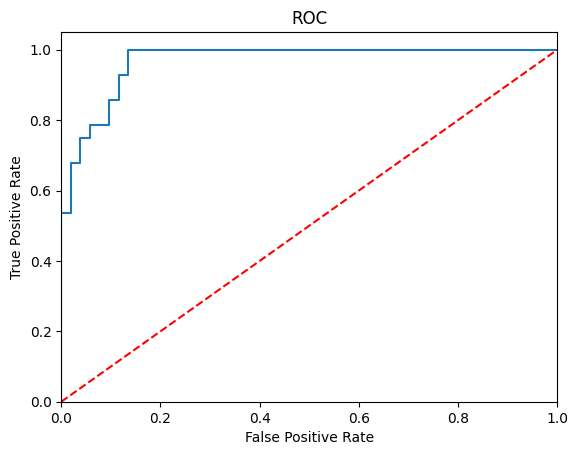

In [ ]:
# Area Under Curve - AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()